In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ln -s /mydrive/Allphabet_dataset /Allphabet_dataset
!ls /Allphabet_dataset

Allphabet_dataset  episode  Input_dataset  N.zip	   R.zip
A.zip		   E.zip    I.zip	   O.zip	   Saved_model
B.zip		   F.zip    K.zip	   processed_data  S.zip
C.zip		   G.zip    L.zip	   P.zip	   T.zip
D.zip		   H.zip    M.zip	   Q.zip	   U.zip


In [4]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = "/Allphabet_dataset/processed_data/train"
valid_data_dir = "/Allphabet_dataset/processed_data/val"
test_data_dir = "/Allphabet_dataset/processed_data/test"

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3600 images belonging to 20 classes.
Found 800 images belonging to 20 classes.


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3600 images belonging to 20 classes.
Found 800 images belonging to 20 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 20 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 6)

Epoch 1/2
17/17 [==============================] - 9s 359ms/step - loss: 1.5704 - accuracy: 0.6796
Epoch 2/2
17/17 [==============================] - 6s 364ms/step - loss: 0.0595 - accuracy: 0.9833


In [ ]:
model.summary()

In [ ]:
model.save('/Allphabet_dataset/Saved_model/ResNet50_Alphabet_aes_1.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
import tensorflow as tf
a = tf.keras.models.load_model('/Allphabet_dataset/Saved_model/ResNet50_AlphabetE6.h5')

In [ ]:
a.summary()

In [ ]:
!ls /mydrive/leftdy

aa.jpg	c.jpg	e.jpg  h.jpg  l.jpg  o.jpg  r.jpg   t.jpg
a.jpg	d.jpg	f.jpg  i.jpg  m.jpg  p.jpg  s.jpg   u.jpg
b.jpg	ee.jpg	g.jpg  k.jpg  n.jpg  q.jpg  ss.jpg


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = a
ans = "abcdefghiklmnopqrstu"
def Print(classes, ans):
  print("predict: ",end = "")
  maxdex = classes.argmax()
  if 
  tmp = list()
  for index,elem in enumerate(classes):
    if 0.01 <= elem <= 0.9:
      tmp.append((elem, index))
  if len(tmp) ==False:
    print(ans[maxdex])
  else:
    print(ans[min(tmp)[1]])

img = cv2.imread('/mydrive/leftdy/a.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)[0]
print("a:{:.4f} b:{:.4f} c:{:.4f} d:{:.4f} e:{:.4f} f:{:.4f} g:{:.4f} h:{:.4f} i:{:.4f} k:{:.4f} l:{:.4f} m:{:.4f} n:{:.4f} o:{:.4f} p:{:.4f} q:{:.4f} r:{:.4f} s:{:.4f} t:{:.4f} u:{:.4f}".format(classes[0],classes[1],classes[2],classes[3],classes[4],classes[5],classes[6],classes[7],classes[8],classes[9],classes[10],classes[11],classes[12],classes[13],classes[14],classes[15],classes[16],classes[17],classes[18],classes[19]))
Print(classes,ans)

img = cv2.imread('/mydrive/leftdy/e.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)[0]
print("a:{:.4f} b:{:.4f} c:{:.4f} d:{:.4f} e:{:.4f} f:{:.4f} g:{:.4f} h:{:.4f} i:{:.4f} k:{:.4f} l:{:.4f} m:{:.4f} n:{:.4f} o:{:.4f} p:{:.4f} q:{:.4f} r:{:.4f} s:{:.4f} t:{:.4f} u:{:.4f}".format(classes[0],classes[1],classes[2],classes[3],classes[4],classes[5],classes[6],classes[7],classes[8],classes[9],classes[10],classes[11],classes[12],classes[13],classes[14],classes[15],classes[16],classes[17],classes[18],classes[19]))
Print(classes,ans)

img = cv2.imread('/mydrive/leftdy/s.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)[0]
print("a:{:.4f} b:{:.4f} c:{:.4f} d:{:.4f} e:{:.4f} f:{:.4f} g:{:.4f} h:{:.4f} i:{:.4f} k:{:.4f} l:{:.4f} m:{:.4f} n:{:.4f} o:{:.4f} p:{:.4f} q:{:.4f} r:{:.4f} s:{:.4f} t:{:.4f} u:{:.4f}".format(classes[0],classes[1],classes[2],classes[3],classes[4],classes[5],classes[6],classes[7],classes[8],classes[9],classes[10],classes[11],classes[12],classes[13],classes[14],classes[15],classes[16],classes[17],classes[18],classes[19]))

Print(classes,ans)

a:0.0000 b:0.0009 c:0.0002 d:0.0001 e:0.0121 f:0.0001 g:0.0003 h:0.0000 i:0.2134 k:0.0000 l:0.0000 m:0.0052 n:0.0000 o:0.0714 p:0.0001 q:0.0000 r:0.0000 s:0.3710 t:0.3252 u:0.0000
predict: e
a:0.0000 b:0.0112 c:0.0000 d:0.0006 e:0.0071 f:0.0002 g:0.0000 h:0.0000 i:0.3518 k:0.0000 l:0.0000 m:0.0008 n:0.0000 o:0.0247 p:0.0000 q:0.0000 r:0.0000 s:0.6012 t:0.0021 u:0.0000
predict: b
a:0.0000 b:0.0045 c:0.0009 d:0.0043 e:0.0020 f:0.0039 g:0.0004 h:0.0000 i:0.2089 k:0.0000 l:0.0000 m:0.0001 n:0.0000 o:0.2929 p:0.0000 q:0.0000 r:0.0000 s:0.4798 t:0.0025 u:0.0000
predict: i


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = a
ans = 'aes'
def Print(classes, ans):
  index = classes.argmax()
  print(ans[index])

img = cv2.imread('/mydrive/leftdy/aa.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)

Print(classes,ans)
img = cv2.imread('/mydrive/leftdy/ee.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)

Print(classes,ans)
img = cv2.imread('/mydrive/leftdy/ss.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)

Print(classes,ans)

s
e
s


In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
base_model.summary()

In [ ]:
a.output

<KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'dense_1')>

In [ ]:
base_model.output

<KerasTensor: shape=(None, None, None, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
predictions = a.output
model = Model(inputs = a.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 6)

Epoch 1/6
113/113 [==============================] - 44s 367ms/step - loss: 0.0694 - accuracy: 0.9758
Epoch 2/6
113/113 [==============================] - 41s 367ms/step - loss: 0.0594 - accuracy: 0.9817
Epoch 3/6
113/113 [==============================] - 42s 367ms/step - loss: 0.0743 - accuracy: 0.9778
Epoch 4/6
113/113 [==============================] - 42s 367ms/step - loss: 0.0389 - accuracy: 0.9867
Epoch 5/6
113/113 [==============================] - 42s 368ms/step - loss: 0.0405 - accuracy: 0.9872
Epoch 6/6
113/113 [==============================] - 41s 365ms/step - loss: 0.0174 - accuracy: 0.9947


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

In [ ]:
model.save('Allphabet_dataset/Saved_model/ResNet50_Alphabet.h5')

In [ ]:
download('Allphabet_dataset/Saved_model/ResNet50_Alphabet.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy: ",test_acc)

800/800 - 372s - loss: 0.3617 - accuracy: 0.9050

Test accuracy:  0.9049999713897705


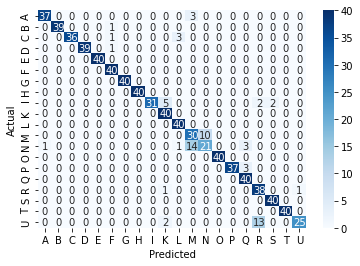

test accuracy : 91.625


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('/Allphabet_dataset/Saved_model/ResNet50_AlphabetE6.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

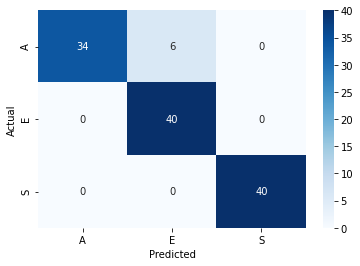

test accuracy : 95.0


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('/Allphabet_dataset/Saved_model/ResNet50_Alphabet_aes.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("on")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

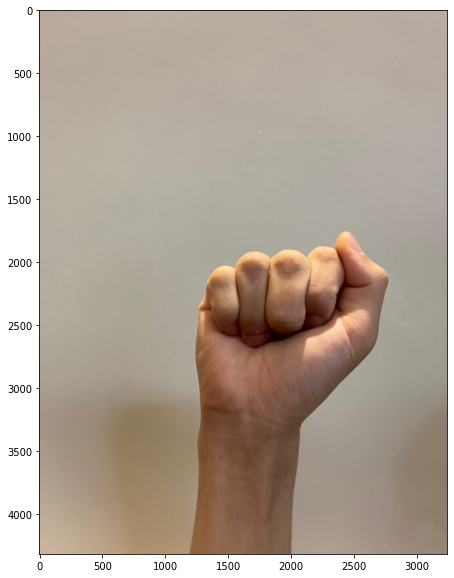

In [ ]:
 imShow('/mydrive/leftdy/a.jpg')

In [ ]:
!ls /mydrive/leftdy

a.jpg  c.jpg  e.jpg  g.jpg  i.jpg  l.jpg  n.jpg  p.jpg	r.jpg  t.jpg
b.jpg  d.jpg  f.jpg  h.jpg  k.jpg  m.jpg  o.jpg  q.jpg	s.jpg  u.jpg


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = tf.keras.models.load_model('/Allphabet_dataset/Saved_model/ResNet50_AlphabetE6.h5')
ans = "abcdefghiklmnopqrstu"
def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

ac=0
su=0
for elem in 'abcdefghiklmnopqrstu':
  print("real class: {},".format(elem), end = " ")
  img = cv2.imread('/mydrive/leftdy/' + elem + '.jpg')
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  classes = model.predict(img)
  ret = Print(classes,ans)
  print("predict class: {}".format(ret))
  su+=1
  if ret == elem: ac += 1

print("\naccuracy {}".format(ac/su))


real class: a, predict class: s
real class: b, predict class: f
real class: c, predict class: c
real class: d, predict class: c
real class: e, predict class: s
real class: f, predict class: f
real class: g, predict class: f
real class: h, predict class: f
real class: i, predict class: i
real class: k, predict class: i
real class: l, predict class: t
real class: m, predict class: m
real class: n, predict class: m
real class: o, predict class: o
real class: p, predict class: c
real class: q, predict class: c
real class: r, predict class: e
real class: s, predict class: s
real class: t, predict class: t
real class: u, predict class: b

accuracy 0.35


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = a

img = cv2.imread('/mydrive/tt/bt.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)
ans = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O"]

def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

Print(classes,ans)

'B'

In [ ]:
!unzip /mydrive/tt/archived.zip -d /mydrive/tt

In [ ]:
!ls /mydrive/tt

archived.zip  at.jpg  bt.jpg  ct.jpg  dt.jpg  et.jpg  ft.jpg  gt.jpg


In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

In [ ]:
input_folder = "/mydrive/tt/Input_dataset"
output = "/mydrive/tt/processed_data"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.6,.2,.2))

Copying files: 600 files [00:07, 81.13 files/s]


In [ ]:
img_height, img_width = (200,200)
batch_size = 32

train_data_dir = "/mydrive/tt/processed_data/train"
valid_data_dir = "/mydrive/tt/processed_data/val"
test_data_dir = "/mydrive/tt/processed_data/test"

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 300 images belonging to 20 classes.
Found 20 images belonging to 20 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 20 images belonging to 20 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 200, 200, 3)

In [ ]:
!ls /mydrive

 경영과학		   handy
 고양이물리학		   IE414_Assignment2_2021_pub.pdf
'과제06&07.pdf'		   IE414_Chap10_v1-2_s.pdf
'10-1. 반도체란.pdf'	   IE414_Chap10_v3_s.pdf
'12-1. 반도체란.pdf'	   IE414_Chap10_v4_s.pdf
'12. 현미경의 발전.pdf'    IE414_Chap12_v1_s.pdf
'13. 물질의 발전.pdf'	   IE414_Chap7_v2_s.pdf
 경과2			   images
'기계 학습_7장_ver1.pdf'   images.txt
'기계 학습_8장.pdf'	   ML
'기계 학습_9장_ver2.pdf'  'My Drive'
 A.jpg			   실습p10_treeTraversal_n_Queens.ppt
 algorithm		   실습p11_sumOFsubsets_m_coloring.ppt
 Allphabet_dataset	   실습p12_BB.ppt
 Alphabet_dataset	   실습p13_sorting.ppt
 B.jpg			   실습p14_searching1.ppt
 C.jpg			   실습p15_searching2.ppt
 Classroom		   paper
'Colab Notebooks'	   pqrs
 data			   RealTimeObjectDetection
 D.jpg			   testes.jpg
 E.jpg			   testesTP.jpg
 FinancialEngineering	   tt
 F.jpg			   ybm
'제목 없는 문서.gdoc'	   YOLOClassification.ipynb
 G.jpg			   yolov4
 hand


In [ ]:
a=ResNet50(include_top=False, weights='/mydrive/Allphabet_dataset/episode/ResNet50_Alphabet.h5')

ValueError: ignored

In [ ]:
!ls /mydrive/Allphabet_dataset/episode/

ResNet50_Alphabet.h5


In [ ]:
a=load_model('/mydrive/Allphabet_dataset/episode/ResNet50_Alphabet.h5')

In [ ]:
type(a)

keras.engine.functional.Functional

In [ ]:
type( ResNet50(include_top=False, weights='imagenet'))

94773248/94765736 [==============================] - 1s 0us/step


tensorflow.python.keras.engine.functional.Functional

In [ ]:
base_model = a
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 10)

ValueError: ignored